In [116]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import networkx as nx  

In [133]:
os.chdir('/Users/andreasabia/Documents/ESCP/Watson Analytics')

In [140]:
df=pd.read_excel("Supermarket Transactions.xlsx", sheet_name='Data')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 18 columns):
Purchase Date         14059 non-null object
Year                  14047 non-null float64
Quarter               14047 non-null float64
Customer ID           14059 non-null int64
Gender                14059 non-null object
Marital Status        14059 non-null object
Homeowner             14059 non-null object
Children              14059 non-null int64
Annual Income         14059 non-null object
City                  14059 non-null object
State or Province     14059 non-null object
Country               14059 non-null object
Product Family        14059 non-null object
Product Department    14059 non-null object
Product Category      14059 non-null object
Units Sold            14059 non-null int64
Revenue               14059 non-null float64
Price                 14059 non-null float64
dtypes: float64(4), int64(3), object(11)
memory usage: 1.9+ MB


In [136]:
#Checking for missing values
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(6)

Total    %
Year            12  0.1
Quarter         12  0.1
Price            0  0.0
Revenue          0  0.0
Customer ID      0  0.0
Gender           0  0.0

In [141]:
data=pd.get_dummies(df, columns=['Gender','Marital Status', 'Homeowner', 'Annual Income','Product Family', 'Product Department', 'Product Category', 'City', 'State or Province', 'Country'])

In [142]:
x = df[['Children']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Children']=x_scaled

In [143]:
x = df[['Price']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Price']=x_scaled

In [138]:
data.head()

Purchase Date    Year  Quarter  Customer ID  Children  Annual Income  \
0  2012-12-18 00:00:00  2012.0      4.0         7223         2    $30K - $50K   
1  2012-12-20 00:00:00  2012.0      4.0         7841         5    $70K - $90K   
2  2012-12-21 00:00:00  2012.0      4.0         8374         2    $50K - $70K   
3  2012-12-21 00:00:00  2012.0      4.0         9619         3    $30K - $50K   
4  2012-12-22 00:00:00  2012.0      4.0         1900         3  $130K - $150K   

   Units Sold  Revenue  Price  Gender_F  ...  State or Province_Guerrero  \
0           5    27.38  5.476         1  ...                           0   
1           5    14.90  2.980         0  ...                           0   
2           3     5.52  1.840         1  ...                           0   
3           4     4.44  1.110         0  ...                           0   
4           4    14.00  3.500         1  ...                           0   

   State or Province_Jalisco  State or Province_OR  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          0                     1   
4                          0                     0   

   State or Province_Veracruz  State or Province_WA  \
0                           0                     0   
1                           0                     0   
2                           0                     1   
3                           0                     0   
4                           0                     0   

   State or Province_Yucatan  State or Province_Zacatecas  Country_Canada  \
0                          0                            0               0   
1                          0                            0               0   
2                          0                            0               0   
3                          0                            0               0   
4                          0                            0               0   

   Country_Mexico  Country_USA  
0               0            1  
1               0            1  
2               0            1  
3               0            1  
4               0            1  

[5 rows x 121 columns]

In [123]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [124]:
corr=data[data.columns[1:]].corr()['Units Sold']
corr.sort_values(ascending=False)

Units Sold            1.000000
Revenue               0.299760
Children              0.123348
City_Tacoma           0.038569
City_Hidalgo          0.024948
                        ...   
City_Guadalajara     -0.094824
City_Bellingham      -0.122248
City_San Francisco   -0.133820
City_Walla Walla     -0.137552
Price                -0.189207
Name: Units Sold, Length: 127, dtype: float64

In [144]:
# Splitting Train and Test Set
X=data.drop(["Units Sold", "Purchase Date", "Year", "Quarter", "Customer ID"], axis=1)
Y=data["Units Sold"]

In [145]:
from sklearn import linear_model
import statsmodels.api as sm

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Columns: 128 entries, Purchase Date to Country_USA
dtypes: float64(5), int64(2), object(1), uint8(120)
memory usage: 2.5+ MB


In [147]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 11104507523.994917
Coefficients: 
 [ 1.10088781e-01  2.15166916e-01 -9.90568725e+00 -4.48534952e+09
 -4.48534952e+09 -3.98776979e+09 -3.98776979e+09 -3.37644421e+09
 -3.37644421e+09  5.29585980e+09  5.29585980e+09  5.29585980e+09
  5.29585980e+09  5.29585980e+09  5.29585980e+09  5.29585980e+09
  5.29585980e+09  1.85373904e+08  1.85373904e+08  3.34962814e+09
  3.40164990e+08  4.28376629e+08 -2.51961309e+09  2.66276475e+09
 -8.96438218e+08 -8.96438218e+08 -8.96438218e+08 -4.06069245e+09
 -3.82855176e+09  4.24266650e+08 -8.96438217e+08  3.58031039e+08
 -8.96438218e+08 -3.82855176e+09 -3.82855176e+09 -8.96438218e+08
 -1.18280147e+09 -8.96438218e+08  4.03658326e+08  3.93055716e+08
  5.63312283e+08  3.94514363e+08  3.31012451e+09  1.45480894e+09
  4.50346427e+08  3.62134788e+08  1.68694963e+09  1.45480894e+09
  2.27199134e+08  1.68694963e+09  1.68694963e+09  1.68694963e+09
  1.68694963e+09  1.68694963e+09  1.68694963e+09  1.68694963e+09
 -1.87225333e+09  1.45480894e+09  1.454808

In [159]:
model = sm.OLS(Y, X[features_sig]).fit()
predictions = model.predict(X[features_sig])

In [160]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     799.2
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:22:01   Log-Likelihood:                -12624.
No. Observations:               14059   AIC:                         2.535e+04
Df Residuals:                   14007   BIC:                         2.574e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [161]:
len(features_sig)

57

In [158]:
#Selecting significant features
features_sig=[]
for A, B in zip(X.columns.to_numpy(), model.pvalues.tolist()):
    if B < 0.05:
        features_sig.append(A)

## Market Basket Analysis

In [162]:
os.chdir('/Users/andreasabia/Documents/ESCP/Watson Analytics')
df=pd.read_excel("Supermarket Transactions.xlsx", sheet_name='Data')

In [163]:
df.shape

(14059, 18)

In [164]:
df.drop_duplicates(subset=('Customer ID','Product Category'),keep='first',inplace=True) 

In [165]:
del df['Children']
del df['Units Sold']
del df['Revenue']
del df['Price']
del df['Year']
del df['Quarter']

In [166]:
data = pd.get_dummies(df, columns=['Product Category']).groupby(['Customer ID'], as_index=True).sum()

In [167]:
data

Product Category_Baking Goods  \
Customer ID                                  
3                                        0   
8                                        1   
9                                        0   
20                                       0   
24                                       0   
...                                    ...   
10273                                    0   
10274                                    0   
10277                                    0   
10278                                    0   
10280                                    0   

             Product Category_Bathroom Products  \
Customer ID                                       
3                                             1   
8                                             0   
9                                             0   
20                                            0   
24                                            0   
...                                         ...   
10273                                         0   
10274                                         0   
10277                                         0   
10278                                         1   
10280                                         0   

             Product Category_Beer and Wine  Product Category_Bread  \
Customer ID                                                           
3                                         0                       0   
8                                         0                       0   
9                                         0                       0   
20                                        0                       0   
24                                        0                       0   
...                                     ...                     ...   
10273                                     0                       0   
10274                                     0                       0   
10277                                     0                       1   
10278                                     0                       0   
10280                                     0                       0   

             Product Category_Breakfast Foods  Product Category_Candles  \
Customer ID                                                               
3                                           0                         0   
8                                           0                         0   
9                                           0                         0   
20                                          0                         0   
24                                          0                         0   
...                                       ...                       ...   
10273                                       0                         1   
10274                                       0                         0   
10277                                       0                         0   
10278                                       0                         0   
10280                                       0                         0   

             Product Category_Candy  Product Category_Canned Anchovies  \
Customer ID                                                              
3                                 0                                  0   
8                                 0                                  0   
9                                 0                                  0   
20                                0                                  0   
24                                1                                  0   
...                             ...                                ...   
10273                             0                                  0   
10274                             0                                  0   
10277                             0                                  0   
10278                             0 

In [15]:
x= list(data.columns)

In [16]:
lst=[]
for i in x:
    lst.append(i[17:])

In [17]:
data.columns = lst
data.columns

Index(['Baking Goods', 'Bathroom Products', 'Beer and Wine', 'Bread',
       'Breakfast Foods', 'Candles', 'Candy', 'Canned Anchovies',
       'Canned Clams', 'Canned Oysters', 'Canned Sardines', 'Canned Shrimp',
       'Canned Soup', 'Canned Tuna', 'Carbonated Beverages',
       'Cleaning Supplies', 'Cold Remedies', 'Dairy', 'Decongestants',
       'Drinks', 'Eggs', 'Electrical', 'Frozen Desserts', 'Frozen Entrees',
       'Fruit', 'Hardware', 'Hot Beverages', 'Hygiene', 'Jams and Jellies',
       'Kitchen Products', 'Magazines', 'Meat', 'Miscellaneous',
       'Packaged Vegetables', 'Pain Relievers', 'Paper Products', 'Pizza',
       'Plastic Products', 'Pure Juice Beverages', 'Seafood', 'Side Dishes',
       'Snack Foods', 'Specialty', 'Starchy Foods', 'Vegetables'],
      dtype='object')

In [10]:
foodrules = apriori(data, min_support=0.001, use_colnames=True)
foodrules.sort_values('support', ascending=False)

support                                           itemsets
44    0.263509                                       (Vegetables)
41    0.243523                                      (Snack Foods)
17    0.149889                                            (Dairy)
24    0.127498                                            (Fruit)
31    0.127128                                             (Meat)
...        ...                                                ...
649   0.001110                      (Plastic Products, Specialty)
1133  0.001110                   (Bread, Side Dishes, Vegetables)
154   0.001110                             (Bread, Canned Shrimp)
2019  0.001110        (Baking Goods, Hygiene, Snack Foods, Dairy)
2543  0.001110  (Snack Foods, Meat, Frozen Desserts, Vegetable...

[2544 rows x 2 columns]

In [11]:
rules = association_rules(foodrules, metric="confidence", min_threshold=0.5)
rules.sort_values('lift', ascending=False)

antecedents                 consequents  \
1324   (Vegetables, Beer and Wine, Hot Beverages)  (Snack Foods, Canned Soup)   
571              (Frozen Entrees, Paper Products)  (Baking Goods, Vegetables)   
1323  (Snack Foods, Beer and Wine, Hot Beverages)   (Canned Soup, Vegetables)   
1274                   (Canned Soup, Meat, Candy)  (Baking Goods, Vegetables)   
1273           (Baking Goods, Canned Soup, Candy)          (Meat, Vegetables)   
...                                           ...                         ...   
126                (Side Dishes, Breakfast Foods)                (Vegetables)   
419               (Starchy Foods, Pain Relievers)                (Vegetables)   
417                 (Snack Foods, Pain Relievers)                (Vegetables)   
122                      (Pizza, Breakfast Foods)                (Vegetables)   
116           (Breakfast Foods, Jams and Jellies)                (Vegetables)   

      antecedent support  consequent support   support  confidence       lift  \
1324            0.001480            0.022761  0.001110    0.750000  32.951220   
571             0.001665            0.028868  0.001110    0.666667  23.094017   
1323            0.002036            0.024426  0.001110    0.545455  22.330579   
1274            0.002221            0.028868  0.001110    0.500000  17.320513   
1273            0.001665            0.040896  0.001110    0.666667  16.301659   
...                  ...                 ...       ...         ...        ...   
126             0.003701            0.263509  0.001850    0.500000   1.897472   
419             0.002961            0.263509  0.001480    0.500000   1.897472   
417             0.010733            0.263509  0.005366    0.500000   1.897472   
122             0.002961            0.263509  0.001480    0.500000   1.897472   
116             0.007032            0.263509  0.003516    0.500000   1.897472   

      leverage  conviction  
1324  0.001077    3.908956  
571   0.001062    2.913397  
1323  0.001061    2.146262  
1274  0.001046    1.942265  
1273  0.001042    2.877313  
...        ...         ...  
126   0.000875    1.472983  
419   0.000700    1.472983  
417   0.002538    1.472983  
122   0.000700    1.472983  
116   0.001663    1.472983  

[1412 rows x 9 columns]

In [12]:
rules = rules[rules['lift']>5]
rules.sort_values('confidence', ascending=False)

antecedents  \
721                (Fruit, Bread, Carbonated Beverages)   
454                (Baking Goods, Fruit, Beer and Wine)   
1066            (Snack Foods, Hot Beverages, Specialty)   
1272             (Canned Soup, Meat, Candy, Vegetables)   
1384                      (Fruit, Hygiene, Canned Soup)   
...                                                 ...   
1210                  (Plastic Products, Hot Beverages)   
473                (Snack Foods, Bread, Paper Products)   
1320  (Snack Foods, Vegetables, Canned Soup, Hot Bev...   
462                               (Bread, Dairy, Candy)   
532                      (Fruit, Dairy, Paper Products)   

                    consequents  antecedent support  consequent support  \
721                     (Dairy)            0.001110            0.149889   
454                      (Meat)            0.001110            0.127128   
1066                    (Dairy)            0.001110            0.149889   
1272             (Baking Goods)            0.001110            0.083827   
1384  (Snack Foods, Vegetables)            0.001480            0.072909   
...                         ...                 ...                 ...   
1210  (Snack Foods, Vegetables)            0.002221            0.072909   
473              (Baking Goods)            0.002591            0.083827   
1320            (Beer and Wine)            0.002221            0.063101   
462              (Baking Goods)            0.002221            0.083827   
532              (Baking Goods)            0.002591            0.083827   

       support  confidence       lift  leverage  conviction  
721   0.001110       1.000   6.671605  0.000944         inf  
454   0.001110       1.000   7.866084  0.000969         inf  
1066  0.001110       1.000   6.671605  0.000944         inf  
1272  0.001110       1.000  11.929360  0.001017         inf  
1384  0.001295       0.875  12.001269  0.001187    7.416728  
...        ...         ...        ...       ...         ...  
1210  0.001110       0.500   6.857868  0.000948    1.854182  
473   0.001295       0.500   5.964680  0.001078    1.832346  
1320  0.001110       0.500   7.923754  0.000970    1.873797  
462   0.001110       0.500   5.964680  0.000924    1.832346  
532   0.001295       0.500   5.964680  0.001078    1.832346  

[117 rows x 9 columns]

In [168]:
salem_df=df[df['City']=='Salem']

In [169]:
salem_data = pd.get_dummies(salem_df, columns=['Product Category']).groupby(['Customer ID'], as_index=True).sum()

In [170]:
salem_data

Product Category_Baking Goods  \
Customer ID                                  
39                                       0   
93                                       0   
117                                      0   
128                                      0   
154                                      1   
...                                    ...   
10118                                    1   
10145                                    0   
10152                                    0   
10176                                    1   
10186                                    0   

             Product Category_Bathroom Products  \
Customer ID                                       
39                                            0   
93                                            0   
117                                           0   
128                                           0   
154                                           0   
...                                         ...   
10118                                         0   
10145                                         0   
10152                                         0   
10176                                         0   
10186                                         1   

             Product Category_Beer and Wine  Product Category_Bread  \
Customer ID                                                           
39                                        0                       0   
93                                        0                       0   
117                                       0                       0   
128                                       1                       0   
154                                       0                       0   
...                                     ...                     ...   
10118                                     0                       0   
10145                                     0                       0   
10152                                     0                       0   
10176                                     0                       0   
10186                                     0                       0   

             Product Category_Breakfast Foods  Product Category_Candles  \
Customer ID                                                               
39                                          0                         0   
93                                          0                         0   
117                                         0                         0   
128                                         0                         0   
154                                         1                         0   
...                                       ...                       ...   
10118                                       0                         0   
10145                                       0                         0   
10152                                       0                         0   
10176                                       0                         0   
10186                                       0                         0   

             Product Category_Candy  Product Category_Canned Anchovies  \
Customer ID                                                              
39                                0                                  0   
93                                0                                  0   
117                               0                                  0   
128                               0                                  0   
154                               0                                  0   
...                             ...                                ...   
10118                             0                                  0   
10145                             0                                  0   
10152                             0                                  0   
10176                             0 

In [171]:
x= list(salem_data.columns)

In [172]:
lst=[]
for i in x:
    lst.append(i[17:])

In [173]:
salem_data.columns = lst
salem_data.columns

Index(['Baking Goods', 'Bathroom Products', 'Beer and Wine', 'Bread',
       'Breakfast Foods', 'Candles', 'Candy', 'Canned Anchovies',
       'Canned Clams', 'Canned Oysters', 'Canned Sardines', 'Canned Shrimp',
       'Canned Soup', 'Canned Tuna', 'Carbonated Beverages',
       'Cleaning Supplies', 'Cold Remedies', 'Dairy', 'Decongestants',
       'Drinks', 'Eggs', 'Electrical', 'Frozen Desserts', 'Frozen Entrees',
       'Fruit', 'Hardware', 'Hot Beverages', 'Hygiene', 'Jams and Jellies',
       'Kitchen Products', 'Magazines', 'Meat', 'Miscellaneous',
       'Packaged Vegetables', 'Pain Relievers', 'Paper Products', 'Pizza',
       'Plastic Products', 'Pure Juice Beverages', 'Seafood', 'Side Dishes',
       'Snack Foods', 'Specialty', 'Starchy Foods', 'Vegetables'],
      dtype='object')

In [174]:
salem_foodrules = apriori(salem_data, min_support=0.0005, use_colnames=True)
salem_foodrules.sort_values('support', ascending=False)

support                                           itemsets
44    0.314607                                       (Vegetables)
41    0.292135                                      (Snack Foods)
31    0.206742                                             (Meat)
17    0.191011                                            (Dairy)
24    0.141573                                            (Fruit)
...        ...                                                ...
1778  0.002247                (Baking Goods, Dairy, Bread, Fruit)
1779  0.002247              (Baking Goods, Dairy, Bread, Hygiene)
1780  0.002247       (Baking Goods, Dairy, Bread, Paper Products)
1781  0.002247     (Baking Goods, Dairy, Bread, Plastic Products)
4129  0.002247  (Dairy, Carbonated Beverages, Baking Goods, Hy...

[4130 rows x 2 columns]

In [197]:
salem_rules = association_rules(salem_foodrules, metric="confidence", min_threshold=0.5)
salem_rules.sort_values('support', ascending=False)

antecedents  \
1024                    (Snack Foods, Electrical)   
1025                     (Electrical, Vegetables)   
416                          (Snack Foods, Bread)   
1264                     (Snack Foods, Specialty)   
1094                    (Fruit, Jams and Jellies)   
...                                           ...   
23685  (Baking Goods, Canned Tuna, Hot Beverages)   
23686          (Baking Goods, Canned Tuna, Fruit)   
23687      (Canned Tuna, Pizza, Jams and Jellies)   
23688         (Canned Tuna, Pizza, Hot Beverages)   
70268                     (Fruit, Paper Products)   

                                             consequents  antecedent support  \
1024                                        (Vegetables)            0.031461   
1025                                       (Snack Foods)            0.035955   
416                                         (Vegetables)            0.024719   
1264                                        (Vegetables)            0.026966   
1094                                        (Vegetables)            0.020225   
...                                                  ...                 ...   
23685                   (Fruit, Pizza, Jams and Jellies)            0.002247   
23686           (Pizza, Jams and Jellies, Hot Beverages)            0.002247   
23687               (Baking Goods, Hot Beverages, Fruit)            0.002247   
23688            (Baking Goods, Jams and Jellies, Fruit)            0.002247   
70268  (Dairy, Carbonated Beverages, Baking Goods, Hy...            0.002247   

       consequent support   support  confidence        lift  leverage  \
1024             0.314607  0.017978    0.571429    1.816327  0.008080   
1025             0.292135  0.017978    0.500000    1.711538  0.007474   
416              0.314607  0.015730    0.636364    2.022727  0.007954   
1264             0.314607  0.013483    0.500000    1.589286  0.004999   
1094             0.314607  0.013483    0.666667    2.119048  0.007120   
...                   ...       ...         ...         ...       ...   
23685            0.002247  0.002247    1.000000  445.000000  0.002242   
23686            0.002247  0.002247    1.000000  445.000000  0.002242   
23687            0.004494  0.002247    1.000000  222.500000  0.002237   
23688            0.004494  0.002247    1.000000  222.500000  0.002237   
70268            0.002247  0.002247    1.000000  445.000000  0.002242   

       conviction  
1024     1.599251  
1025     1.415730  
416      1.884831  
1264     1.370787  
1094     2.056180  
...           ...  
23685         inf  
23686         inf  
23687         inf  
23688         inf  
70268         inf  

[70269 rows x 9 columns]

In [204]:
salem_rules = salem_rules[salem_rules['lift']>1]
salem_rules= salem_rules.sort_values('support', ascending=False)

In [205]:
salem_rules.head(15)

antecedents         consequents  \
1025          (Electrical, Vegetables)       (Snack Foods)   
1024         (Snack Foods, Electrical)        (Vegetables)   
416               (Snack Foods, Bread)        (Vegetables)   
1094         (Fruit, Jams and Jellies)        (Vegetables)   
1264          (Snack Foods, Specialty)        (Vegetables)   
1003                (Electrical, Meat)       (Snack Foods)   
149   (Baking Goods, Jams and Jellies)        (Vegetables)   
637               (Canned Soup, Dairy)              (Meat)   
997     (Jams and Jellies, Electrical)        (Vegetables)   
994     (Jams and Jellies, Electrical)       (Snack Foods)   
1121            (Vegetables, Hardware)  (Jams and Jellies)   
922                 (Dairy, Specialty)        (Vegetables)   
6                      (Miscellaneous)       (Canned Soup)   
153     (Baking Goods, Paper Products)       (Snack Foods)   
9                            (Seafood)        (Vegetables)   

      antecedent support  consequent support   support  confidence      lift  \
1025            0.035955            0.292135  0.017978    0.500000  1.711538   
1024            0.031461            0.314607  0.017978    0.571429  1.816327   
416             0.024719            0.314607  0.015730    0.636364  2.022727   
1094            0.020225            0.314607  0.013483    0.666667  2.119048   
1264            0.026966            0.314607  0.013483    0.500000  1.589286   
1003            0.022472            0.292135  0.011236    0.500000  1.711538   
149             0.011236            0.314607  0.008989    0.800000  2.542857   
637             0.011236            0.206742  0.008989    0.800000  3.869565   
997             0.013483            0.314607  0.008989    0.666667  2.119048   
994             0.013483            0.292135  0.008989    0.666667  2.282051   
1121            0.013483            0.123596  0.008989    0.666667  5.393939   
922             0.015730            0.314607  0.008989    0.571429  1.816327   
6               0.015730            0.089888  0.008989    0.571429  6.357143   
153             0.011236            0.292135  0.008989    0.800000  2.738462   
9               0.013483            0.314607  0.008989    0.666667  2.119048   

      leverage  conviction  
1025  0.007474    1.415730  
1024  0.008080    1.599251  
416   0.007954    1.884831  
1094  0.007120    2.056180  
1264  0.004999    1.370787  
1003  0.004671    1.415730  
149   0.005454    3.426966  
637   0.006666    3.966292  
997   0.004747    2.056180  
994   0.005050    2.123596  
1121  0.007322    2.629213  
922   0.004040    1.599251  
6     0.007575    2.123596  
153   0.005706    3.539326  
9     0.004747    2.056180

In [206]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in salem_rules.iloc[i]['antecedents']:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 5)
       
        for c in salem_rules.iloc[i]['consequents']:
             
                G1.add_nodes_from([a])
            
                G1.add_edge("R"+str(i), c, color=colors[i],  weight=5)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('red')
        else:
            color_map.append('white')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.layout.spring_layout(G1,k=2, scale=1000)
    nx.draw(G1, pos, edges=edges, node_size=500, node_color = color_map, edge_color=colors, width=weights, style="dashed", font_size=20, with_labels=False)            

    nx.draw_networkx_labels(G1, pos)
    plt.show()

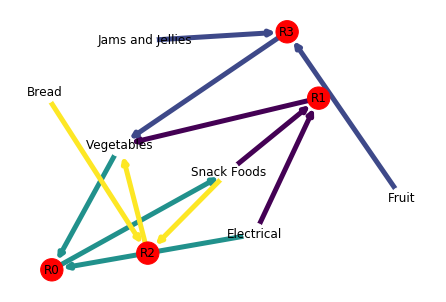

In [235]:
draw_graph(salem_rules,4)

### Customer Analysis

#### Cohort Analysis

In [36]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import networkx as nx  
os.chdir('/Users/andreasabia/Documents/ESCP/Watson Analytics')
df=pd.read_excel("Supermarket Transactions.xlsx", sheet_name='Data')

In [37]:
import datetime as dt

In [38]:
customer=df

In [39]:
customer=customer.ix[customer['Purchase Date'].str.len() !=10]
customer['Purchase Date']=pd.to_datetime(customer['Purchase Date'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
customer.head()

Purchase Date    Year  Quarter  Customer ID Gender Marital Status Homeowner  \
0    2012-12-18  2012.0      4.0         7223      F              S         Y   
1    2012-12-20  2012.0      4.0         7841      M              M         Y   
2    2012-12-21  2012.0      4.0         8374      F              M         N   
3    2012-12-21  2012.0      4.0         9619      M              M         Y   
4    2012-12-22  2012.0      4.0         1900      F              S         Y   

   Children  Annual Income           City State or Province Country  \
0         2    $30K - $50K    Los Angeles                CA     USA   
1         5    $70K - $90K    Los Angeles                CA     USA   
2         2    $50K - $70K      Bremerton                WA     USA   
3         3    $30K - $50K       Portland                OR     USA   
4         3  $130K - $150K  Beverly Hills                CA     USA   

  Product Family Product Department      Product Category  Units Sold  \
0           Food        Snack Foods           Snack Foods           5   
1           Food            Produce            Vegetables           5   
2           Food        Snack Foods           Snack Foods           3   
3           Food             Snacks                 Candy           4   
4          Drink          Beverages  Carbonated Beverages           4   

   Revenue  Price  
0    27.38  5.476  
1    14.90  2.980  
2     5.52  1.840  
3     4.44  1.110  
4    14.00  3.500

In [41]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
customer['InvoiceMonth'] = customer['Purchase Date'].apply(get_month)
grouping = customer.groupby('Customer ID')['InvoiceMonth']
customer['CohortMonth'] = grouping.transform('min')
customer.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Purchase Date    Year  Quarter  Customer ID Gender Marital Status Homeowner  \
0    2012-12-18  2012.0      4.0         7223      F              S         Y   
1    2012-12-20  2012.0      4.0         7841      M              M         Y   
2    2012-12-21  2012.0      4.0         8374      F              M         N   
3    2012-12-21  2012.0      4.0         9619      M              M         Y   
4    2012-12-22  2012.0      4.0         1900      F              S         Y   

   Children  Annual Income           City State or Province Country  \
0         2    $30K - $50K    Los Angeles                CA     USA   
1         5    $70K - $90K    Los Angeles                CA     USA   
2         2    $50K - $70K      Bremerton                WA     USA   
3         3    $30K - $50K       Portland                OR     USA   
4         3  $130K - $150K  Beverly Hills                CA     USA   

  Product Family Product Department      Product Category  Units Sold  \
0           Food        Snack Foods           Snack Foods           5   
1           Food            Produce            Vegetables           5   
2           Food        Snack Foods           Snack Foods           3   
3           Food             Snacks                 Candy           4   
4          Drink          Beverages  Carbonated Beverages           4   

   Revenue  Price InvoiceMonth CohortMonth  
0    27.38  5.476   2012-12-01  2012-12-01  
1    14.90  2.980   2012-12-01  2012-12-01  
2     5.52  1.840   2012-12-01  2012-12-01  
3     4.44  1.110   2012-12-01  2012-12-01  
4    14.00  3.500   2012-12-01  2012-12-01

In [42]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [43]:
invoice_year, invoice_month, _ = get_date_int(customer, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(customer, 'CohortMonth')

In [44]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [45]:
customer['CohortIndex'] = years_diff * 12 + months_diff + 1
customer.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Purchase Date    Year  Quarter  Customer ID Gender Marital Status Homeowner  \
0    2012-12-18  2012.0      4.0         7223      F              S         Y   
1    2012-12-20  2012.0      4.0         7841      M              M         Y   
2    2012-12-21  2012.0      4.0         8374      F              M         N   
3    2012-12-21  2012.0      4.0         9619      M              M         Y   
4    2012-12-22  2012.0      4.0         1900      F              S         Y   

   Children  Annual Income           City  ... Country Product Family  \
0         2    $30K - $50K    Los Angeles  ...     USA           Food   
1         5    $70K - $90K    Los Angeles  ...     USA           Food   
2         2    $50K - $70K      Bremerton  ...     USA           Food   
3         3    $30K - $50K       Portland  ...     USA           Food   
4         3  $130K - $150K  Beverly Hills  ...     USA          Drink   

  Product Department      Product Category Units Sold  Revenue  Price  \
0        Snack Foods           Snack Foods          5    27.38  5.476   
1            Produce            Vegetables          5    14.90  2.980   
2        Snack Foods           Snack Foods          3     5.52  1.840   
3             Snacks                 Candy          4     4.44  1.110   
4          Beverages  Carbonated Beverages          4    14.00  3.500   

   InvoiceMonth CohortMonth CohortIndex  
0    2012-12-01  2012-12-01           1  
1    2012-12-01  2012-12-01           1  
2    2012-12-01  2012-12-01           1  
3    2012-12-01  2012-12-01           1  
4    2012-12-01  2012-12-01           1  

[5 rows x 21 columns]

In [46]:
customer.CohortIndex.value_counts()

1     5963
2      998
3      666
5      600
6      599
4      580
7      553
9      543
8      487
10     432
11     414
12     319
13     291
14     228
15     223
16     221
18     182
17     174
19     169
20     147
21     115
22      78
23      48
24      15
25       2
Name: CohortIndex, dtype: int64

In [47]:
customer2013=customer[(customer["Purchase Date"]>="2013-01-01") & (customer["Purchase Date"]<"2014-01-01")]

In [48]:
salemcustomer2013=customer[(customer["Purchase Date"]>="2013-01-01") & (customer["Purchase Date"]<"2014-01-01") \
                           &(customer["City"]=="Salem")]

In [49]:
customer2014=customer[(customer["Purchase Date"]>="2014-01-01")]

In [50]:
salemcustomer2014=customer[(customer["Purchase Date"]>="2014-01-01") &(customer["City"]=="Salem") ]

In [51]:
customer2014['Purchase Date']=pd.to_datetime(customer2014['Purchase Date']).dt.date

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
grouping = salemcustomer2013.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
columns='CohortIndex',
values='Customer ID')
print(cohort_counts)

CohortIndex    1     2    3    4     5    6    7    8    9    10   11   12  \
CohortMonth                                                                  
2012-12-01    NaN   1.0  3.0  1.0   NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN   
2013-01-01   51.0  11.0  9.0  7.0   9.0  5.0  5.0  5.0  5.0  2.0  8.0  5.0   
2013-02-01   45.0  13.0  7.0  4.0   3.0  5.0  3.0  4.0  3.0  2.0  5.0  NaN   
2013-03-01   47.0  11.0  3.0  5.0   6.0  5.0  4.0  3.0  5.0  3.0  NaN  NaN   
2013-04-01   47.0   6.0  3.0  5.0  10.0  5.0  5.0  5.0  6.0  NaN  NaN  NaN   
2013-05-01   37.0   3.0  7.0  3.0   4.0  3.0  3.0  4.0  NaN  NaN  NaN  NaN   
2013-06-01   23.0   4.0  5.0  2.0   3.0  3.0  3.0  NaN  NaN  NaN  NaN  NaN   
2013-07-01   27.0   4.0  2.0  NaN   2.0  5.0  NaN  NaN  NaN  NaN  NaN  NaN   
2013-08-01   22.0   5.0  2.0  2.0   5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2013-09-01    9.0   1.0  NaN  2.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2013-10-01   12.0   2.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN  NaN

In [62]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

CohortIndex     1     2     3     4     5     6     7     8     9    10    11  \
CohortMonth                                                                     
2012-12-01     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2013-01-01   100.0  21.6  17.6  13.7  17.6   9.8   9.8   9.8   9.8  3.9  15.7   
2013-02-01   100.0  28.9  15.6   8.9   6.7  11.1   6.7   8.9   6.7  4.4  11.1   
2013-03-01   100.0  23.4   6.4  10.6  12.8  10.6   8.5   6.4  10.6  6.4   NaN   
2013-04-01   100.0  12.8   6.4  10.6  21.3  10.6  10.6  10.6  12.8  NaN   NaN   
2013-05-01   100.0   8.1  18.9   8.1  10.8   8.1   8.1  10.8   NaN  NaN   NaN   
2013-06-01   100.0  17.4  21.7   8.7  13.0  13.0  13.0   NaN   NaN  NaN   NaN   
2013-07-01   100.0  14.8   7.4   NaN   7.4  18.5   NaN   NaN   NaN  NaN   NaN   
2013-08-01   100.0  22.7   9.1   9.1  22.7   NaN   NaN   NaN   NaN  NaN   NaN   
2013-09-01   100.0  11.1   NaN  22.2   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2013-10-01   100.0  16.7   8.3   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2013-11-01   100.0  20.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   
2013-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   

CohortIndex   12  13  
CohortMonth           
2012-12-01   NaN NaN  
2013-01-01   9.8 NaN  
2013-02-01   NaN NaN  
2013-03-01   NaN NaN  
2013-04-01   NaN NaN  
2013-05-01   NaN NaN  
2013-06-01   NaN NaN  
2013-07-01   NaN NaN  
2013-08-01   NaN NaN  
2013-09-01   NaN NaN  
2013-10-01   NaN NaN  
2013-11-01   NaN NaN  
2013-12-01   NaN NaN

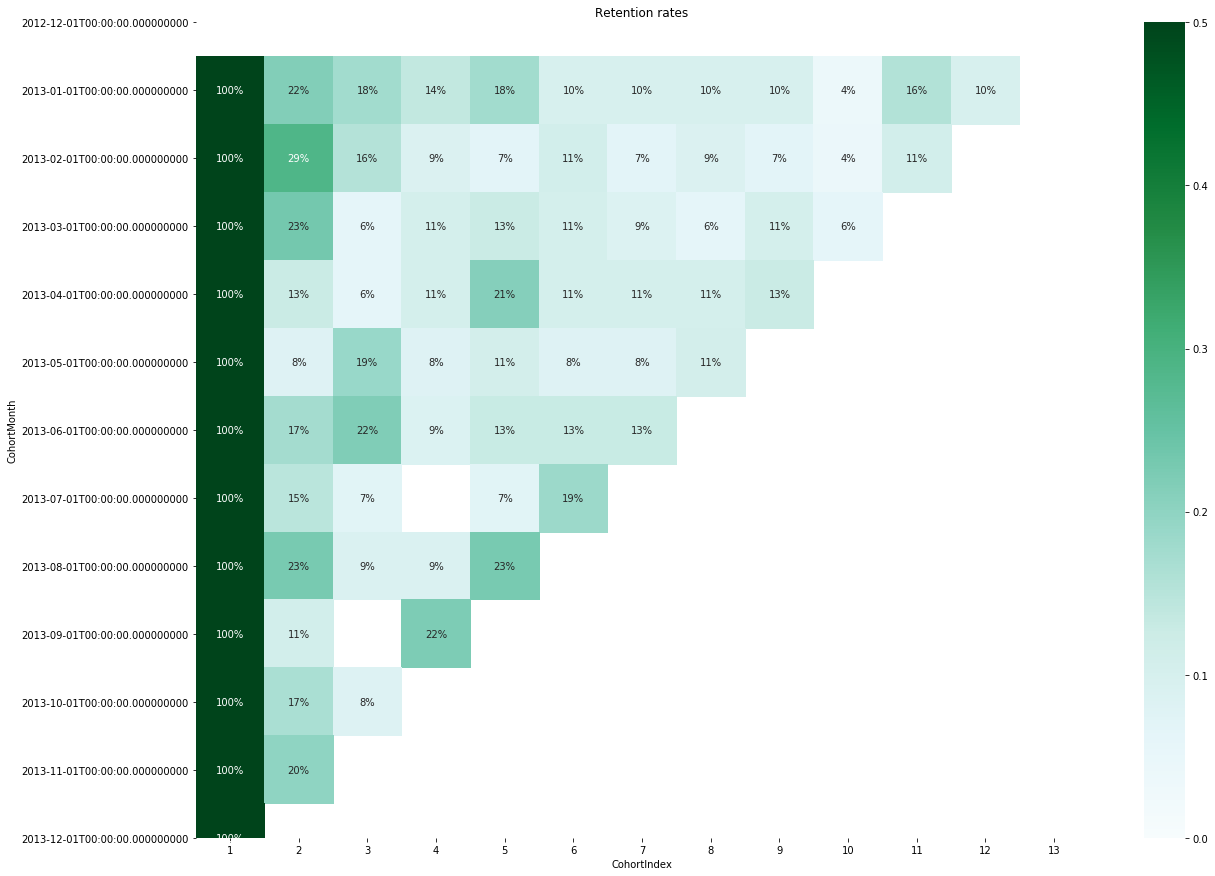

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.title('Retention rates')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.show()

In [97]:
grouping = customer2013.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Units Sold'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',
columns='CohortIndex',
values='Units Sold')
average_quantity.round(1)

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2012-12-01   NaN  4.0  3.7  3.8  3.0  5.0  4.0  NaN  3.0  5.0  5.0  4.5  3.2
2013-01-01   4.1  4.0  3.8  4.1  3.8  4.4  3.9  4.1  3.9  4.0  4.1  4.1  NaN
2013-02-01   4.1  4.0  4.3  4.0  4.1  4.0  4.4  4.6  4.3  4.5  4.5  NaN  NaN
2013-03-01   4.1  4.2  4.3  4.4  4.2  4.3  4.5  4.2  4.1  4.2  NaN  NaN  NaN
2013-04-01   4.0  4.0  4.2  4.2  4.0  3.9  4.3  4.3  4.1  NaN  NaN  NaN  NaN
2013-05-01   3.9  3.9  4.1  3.6  4.4  4.0  3.8  4.2  NaN  NaN  NaN  NaN  NaN
2013-06-01   4.1  3.9  3.9  4.1  4.4  4.4  4.3  NaN  NaN  NaN  NaN  NaN  NaN
2013-07-01   4.0  4.1  4.2  4.0  4.0  4.1  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2013-08-01   3.9  3.7  4.1  4.5  4.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2013-09-01   3.9  4.2  3.8  3.8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2013-10-01   4.0  3.6  4.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2013-11-01   3.9  3.8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2013-12-01   3.9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

#### RFM analysis

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import networkx as nx
import datetime as dt

In [2]:
os.chdir('/Users/andreasabia/Documents/ESCP/Watson Analytics')
df=pd.read_excel("Supermarket Transactions.xlsx", sheet_name='Data')
rfm=df
rfm=rfm.ix[rfm['Purchase Date'].str.len() !=10]
rfm['Purchase Date']=pd.to_datetime(rfm['Purchase Date'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [3]:
salemrfm=rfm[(rfm["Purchase Date"]>="2014-01-01") &(rfm["City"]=="Salem") ]

In [4]:
print('Min:{}; Max:{}'.format(min(rfm["Purchase Date"]), max(rfm["Purchase Date"])))

Min:2012-12-18 00:00:00; Max:2014-12-31 00:00:00


In [5]:
snapshot_date = max(salemrfm["Purchase Date"]) + dt.timedelta(days=1)

In [6]:
datamart = salemrfm.groupby(['Customer ID']).agg({
'Purchase Date': lambda x: (snapshot_date - x.max()).days,
'Customer ID': 'count',
'Revenue': 'sum'})

In [7]:
datamart.rename(columns = {'Purchase Date': 'Recency','Customer ID': 'Frequency','Revenue': 'MonetaryValue'}\
                , inplace=True)

In [8]:
datamart.sort_values(by="MonetaryValue", ascending=True)

Recency  Frequency  MonetaryValue
Customer ID                                   
3001              72          1           2.08
9578             143          1           2.22
4623             307          1           2.63
1166             224          1           2.79
5982             229          1           2.93
...              ...        ...            ...
1339              48          4          74.83
5869             102          6          75.01
4490              43          3          75.31
208                8          5          94.35
8667             100          5          96.64

[346 rows x 3 columns]

In [9]:
datamart.Frequency.value_counts()

1    157
2     99
3     70
4     14
5      5
6      1
Name: Frequency, dtype: int64

In [10]:
r_labels = range(4, 0, -1)
f_labels = range(1,4)
m_labels = range(1,5)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels, duplicates="drop")
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(R = r_quartiles.values)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

In [11]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

In [23]:
topcustomers=datamart
topcustomers=topcustomers.drop(["Recency","Frequency","MonetaryValue","R","F","M","RFM_Segment"], axis=1)

In [24]:
target=salemrfm.merge(topcustomers,how="left",on="Customer ID")

In [25]:
t=target[target["General_Segment"]=="1. Gold"]

In [26]:
t

Purchase Date    Year  Quarter  Customer ID Gender Marital Status  \
3      2014-01-02  2014.0      1.0         6982      M              M   
7      2014-01-03  2014.0      1.0         1626      M              M   
9      2014-01-07  2014.0      1.0         9929      M              M   
10     2014-01-07  2014.0      1.0         9929      M              M   
11     2014-01-08  2014.0      1.0         1773      M              M   
..            ...     ...      ...          ...    ...            ...   
646    2014-12-19  2014.0      4.0         1773      M              M   
647    2014-12-20  2014.0      4.0         9504      F              S   
648    2014-12-22  2014.0      4.0         2656      F              M   
649    2014-12-24  2014.0      4.0         2234      M              S   
651    2014-12-26  2014.0      4.0         1429      F              S   

    Homeowner  Children  Annual Income   City State or Province Country  \
3           Y         1    $70K - $90K  Salem                OR     USA   
7           Y         0  $130K - $150K  Salem                OR     USA   
9           Y         3    $50K - $70K  Salem                OR     USA   
10          Y         3    $50K - $70K  Salem                OR     USA   
11          N         2    $30K - $50K  Salem                OR     USA   
..        ...       ...            ...    ...               ...     ...   
646         N         2    $30K - $50K  Salem                OR     USA   
647         Y         2    $30K - $50K  Salem                OR     USA   
648         Y         2    $10K - $30K  Salem                OR     USA   
649         Y         1    $30K - $50K  Salem                OR     USA   
651         N         4    $30K - $50K  Salem                OR     USA   

     Product Family Product Department  Product Category  Units Sold  Revenue  \
3              Food              Dairy             Dairy           4    10.37   
7              Food               Deli              Meat           5     2.92   
9              Food        Baked Goods             Bread           5     8.71   
10             Food            Produce        Vegetables           7    36.98   
11             Food        Snack Foods       Snack Foods           5    18.67   
..              ...                ...               ...         ...      ...   
646  Non-Consumable          Household        Electrical           4    20.05   
647            Food             Snacks             Candy           5     3.76   
648  Non-Consumable          Household  Kitchen Products           4     7.87   
649            Food            Produce             Fruit           5    19.11   
651            Food              Dairy             Dairy           4     8.16   

        Price  RFM_Score General_Segment  
3    2.592500        8.0         1. Gold  
7    0.584000       10.0         1. Gold  
9    1.742000        9.0         1. Gold  
10   5.282857        9.0         1. Gold  
11   3.734000       10.0         1. Gold  
..        ...        ...             ...  
646  5.012500       10.0         1. Gold  
647  0.752000       10.0         1. Gold  
648  1.967500        9.0         1. Gold  
649  3.822000       10.0         1. Gold  
651  2.040000        8.0         1. Gold  

[310 rows x 20 columns]

In [27]:
t.describe()

Year     Quarter   Customer ID    Children  Units Sold     Revenue  \
count   310.0  310.000000    310.000000  310.000000  310.000000  310.000000   
mean   2014.0    2.535484   4528.816129    2.429032    4.216129   14.615065   
std       0.0    1.095902   3045.279423    1.445827    1.086128    8.511582   
min    2014.0    1.000000    154.000000    0.000000    2.000000    1.800000   
25%    2014.0    2.000000   1718.000000    1.000000    3.000000    8.580000   
50%    2014.0    2.500000   3979.500000    2.000000    4.000000   12.475000   
75%    2014.0    4.000000   7173.750000    4.000000    5.000000   19.580000   
max    2014.0    4.000000  10118.000000    5.000000    7.000000   43.120000   

            Price   RFM_Score  
count  310.000000  310.000000  
mean     3.522717    9.064516  
std      1.944660    1.002763  
min      0.450000    8.000000  
25%      2.048500    8.000000  
50%      3.223095    9.000000  
75%      4.652500   10.000000  
max     11.060000   11.000000

In [32]:
a=t[["Children","Gender","Marital Status","Homeowner","Annual Income"]]

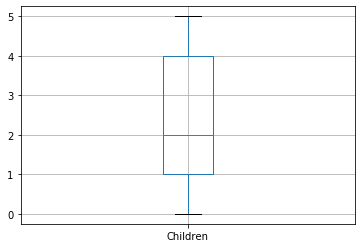

In [35]:
a.boxplot()

In [28]:
t.to_csv("TopCustomers.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf63910>,
      dtype=object)

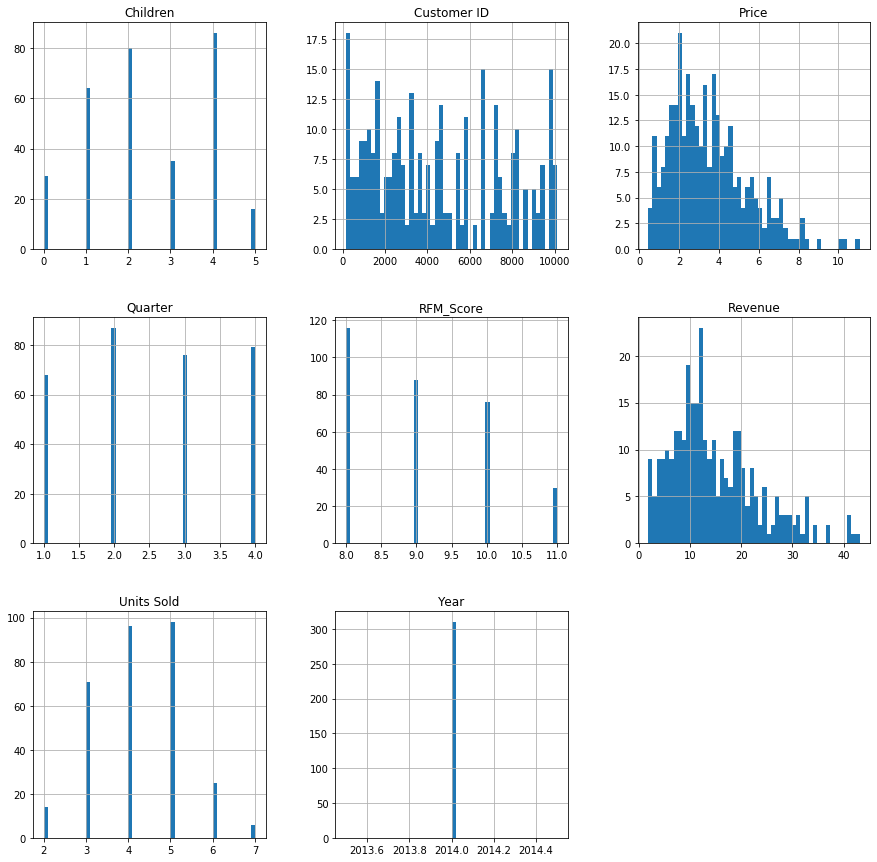

In [69]:
t.hist(bins=50,figsize=(15,15))

In [61]:
#Checking Data
for i in t.columns:
    print ("---- %s ---" % i)
    print (t[i].value_counts())

---- Purchase Date ---
2014-11-30    1
2014-12-13    1
2014-08-30    1
2014-03-22    1
2014-08-06    1
2014-10-26    1
2014-12-15    1
2014-12-06    1
2014-07-19    1
2014-02-26    1
2014-09-13    1
2014-10-08    1
2014-11-21    1
2014-11-15    1
2014-11-09    1
2014-11-17    1
2014-11-03    1
2014-01-27    1
2014-07-08    1
2014-12-11    1
2014-03-19    1
2014-04-13    1
2014-05-08    1
2014-04-26    1
2014-11-05    1
2014-11-26    1
2014-10-30    1
2014-05-15    1
2014-12-19    1
2014-03-15    1
Name: Purchase Date, dtype: int64
---- Year ---
2014.0    30
Name: Year, dtype: int64
---- Quarter ---
4.0    16
3.0     5
1.0     5
2.0     4
Name: Quarter, dtype: int64
---- Customer ID ---
208     5
7149    5
9788    4
1339    4
950     4
1253    4
2468    4
Name: Customer ID, dtype: int64
---- Gender ---
F    22
M     8
Name: Gender, dtype: int64
---- Marital Status ---
S    21
M     9
Name: Marital Status, dtype: int64
---- Homeowner ---
Y    18
N    12
Name: Homeowner, dtype: int64
----

In [20]:
topcustomers=datamart[datamart["RFM_Score"]==11].index.tolist()

In [15]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)

RFM_Segment
111    37
112    24
412    23
211    20
313    19
212    17
213    17
312    17
311    17
424    16
113    16
224    15
413    14
411    13
324    12
323     9
214     8
434     7
414     6
423     5
334     5
234     5
314     5
124     4
223     3
114     3
422     2
333     1
433     1
134     1
123     1
122     1
322     1
222     1
dtype: int64

In [16]:
datamart.groupby('RFM_Score').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue':'mean' }).round(1)

Recency  Frequency  MonetaryValue
RFM_Score                                   
3.0          286.9        1.1            8.6
4.0          240.2        1.2           11.3
5.0          182.7        1.4           16.3
6.0          128.5        1.4           19.6
7.0          101.8        1.8           25.6
8.0          100.9        2.5           35.2
9.0           92.4        3.0           44.2
10.0          50.7        3.5           53.5
11.0          29.1        4.3           64.7

In [17]:
datamart.groupby('RFM_Score').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         286.9       1.1           8.6    37
4.0         240.2       1.2          11.3    44
5.0         182.7       1.4          16.3    51
6.0         128.5       1.4          19.6    52
7.0         101.8       1.8          25.6    58
8.0         100.9       2.5          35.2    46
9.0          92.4       3.0          44.2    29
10.0         50.7       3.5          53.5    22
11.0         29.1       4.3          64.7     7

In [18]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({'Recency': 'mean'\
                                         ,'Frequency': 'mean','MonetaryValue': 'mean'}).round(1)

NameError: name 'segment_me' is not defined

In [19]:
def segment_me(df):
    if df['RFM_Score'] > 7:
        return '1. Gold'
    elif (df['RFM_Score'] >= 6) and (df['RFM_Score'] <=7):
        return '2. Silver'
    else:
        return '3. Bronze'

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({'Recency': 'mean'\
                                         ,'Frequency': 'mean','MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
1. Gold            83.1       3.0          43.6   104
2. Silver         114.5       1.6          22.8   110
3. Bronze         231.1       1.2          12.5   132

### Clustering

In [172]:
cluster=datamart.loc[:,:"MonetaryValue"]

In [173]:
cluster.describe()

Recency   Frequency  MonetaryValue
count  346.000000  346.000000     346.000000
mean   149.511561    1.884393      25.100318
std     95.348065    0.991815      17.313852
min      1.000000    1.000000       2.080000
25%     67.250000    1.000000      12.632500
50%    136.500000    2.000000      20.345000
75%    226.750000    3.000000      32.732500
max    360.000000    6.000000      96.640000

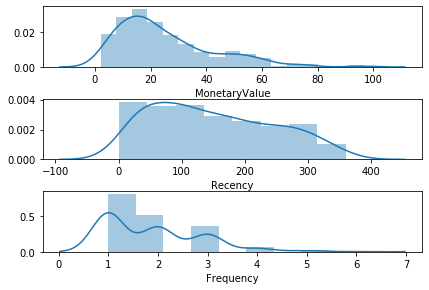

In [174]:
fig, axs=plt.subplots(3,1)
fig.tight_layout()
sns.distplot(cluster['MonetaryValue'], ax=axs[0])
sns.distplot(cluster['Recency'], ax=axs[1])
sns.distplot(cluster['Frequency'], ax=axs[2])
#axs[0].title.set_text('MonetaryValue')
#axs[1].title.set_text('Recency')
#axs[2].title.set_text('Frequency')
plt.show()

In [175]:
datamart_log = np.log(cluster)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)

In [193]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)

In [194]:
kmeans.fit(datamart_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [195]:
cluster_labels = kmeans.labels_

In [196]:
datamart_rfm_k2 = cluster.assign(Cluster = cluster_labels)
datamart_rfm_k2.groupby(['Cluster']).agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         112.0       3.0          37.0   173
1         187.0       1.0          14.0   173

In [192]:
datamart_rfm_k2 = cluster.assign(Cluster = cluster_labels)
datamart_rfm_k2.groupby(['Cluster']).agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         188.0       1.0          13.0   160
1          27.0       3.0          36.0    50
2         150.0       3.0          35.0   136

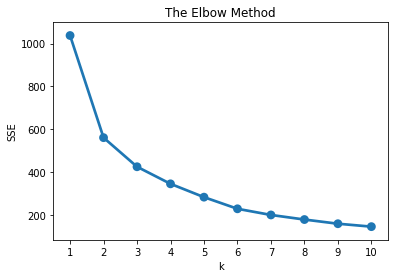

In [183]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [198]:
tomerge=datamart_rfm_k2
tomerge["Customer ID"]=tomerge.index

Recency  Frequency  MonetaryValue  Cluster  Customer ID
Customer ID                                                         
39               348          1          14.28        1           39
93               330          1          12.22        1           93
117               33          1          13.46        1          117
154              129          3          36.10        0          154
169              283          1           9.25        1          169
...              ...        ...            ...      ...          ...
10106            109          2          28.79        0        10106
10118             92          3          31.26        0        10118
10145            298          1           8.94        1        10145
10152            325          1          30.99        1        10152
10186            111          1          21.28        1        10186

[346 rows x 5 columns]

In [200]:
tomerge.reset_index(level=0, inplace=True)

In [212]:
target=salemrfm.merge(tomerge,how="left",on="Customer ID")

In [213]:
target.Cluster.value_counts()

0    462
1    190
Name: Cluster, dtype: int64

In [214]:
target=target[(target.Cluster==0)]

In [219]:
target.drop_duplicates("Customer ID", keep="first", inplace=True)

In [220]:
#Checking Data
for i in target.columns:
    print ("---- %s ---" % i)
    print (target[i].value_counts())

---- Purchase Date ---
2014-04-20    4
2014-05-31    4
2014-02-24    3
2014-01-28    3
2014-06-13    3
             ..
2014-07-24    1
2014-04-22    1
2014-03-22    1
2014-04-29    1
2014-03-15    1
Name: Purchase Date, Length: 118, dtype: int64
---- Year ---
2014.0    173
Name: Year, dtype: int64
---- Quarter ---
1.0    80
2.0    58
3.0    29
4.0     6
Name: Quarter, dtype: int64
---- Customer ID ---
1996    1
4431    1
6744    1
5206    1
346     1
       ..
5869    1
5533    1
4508    1
8091    1
7149    1
Name: Customer ID, Length: 173, dtype: int64
---- Gender ---
F    88
M    85
Name: Gender, dtype: int64
---- Marital Status ---
S    99
M    74
Name: Marital Status, dtype: int64
---- Homeowner ---
Y    97
N    76
Name: Homeowner, dtype: int64
---- Children ---
4    49
2    37
1    32
3    26
0    18
5    11
Name: Children, dtype: int64
---- Annual Income ---
$30K - $50K      57
$10K - $30K      35
$70K - $90K      26
$50K - $70K      25
$130K - $150K    15
$90K - $110K      7
$11

## Forecasting

In [214]:
os.chdir('/Users/andreasabia/Documents/ESCP/Watson Analytics')
forecastdf=pd.read_excel("Supermarket Transactions.xlsx", sheet_name='Data')

In [215]:
forecastdf=forecastdf[['Purchase Date','City','Product Family','Revenue']]

In [216]:
forecastdf.head()

Purchase Date           City Product Family  Revenue
0  2012-12-18 00:00:00    Los Angeles           Food    27.38
1  2012-12-20 00:00:00    Los Angeles           Food    14.90
2  2012-12-21 00:00:00      Bremerton           Food     5.52
3  2012-12-21 00:00:00       Portland           Food     4.44
4  2012-12-22 00:00:00  Beverly Hills          Drink    14.00

In [217]:
forecastdf=forecastdf.ix[forecastdf['Purchase Date'].str.len() !=10]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [218]:
forecastdf.index=pd.to_datetime(forecastdf['Purchase Date'])

In [219]:
forecastdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14047 entries, 2012-12-18 to 2014-12-31
Data columns (total 4 columns):
Purchase Date     14047 non-null object
City              14047 non-null object
Product Family    14047 non-null object
Revenue           14047 non-null float64
dtypes: float64(1), object(3)
memory usage: 548.7+ KB


In [220]:
ts=forecastdf

In [221]:
ts=ts.resample('M').sum().interpolate('linear')

In [222]:
type(ts)

pandas.core.frame.DataFrame

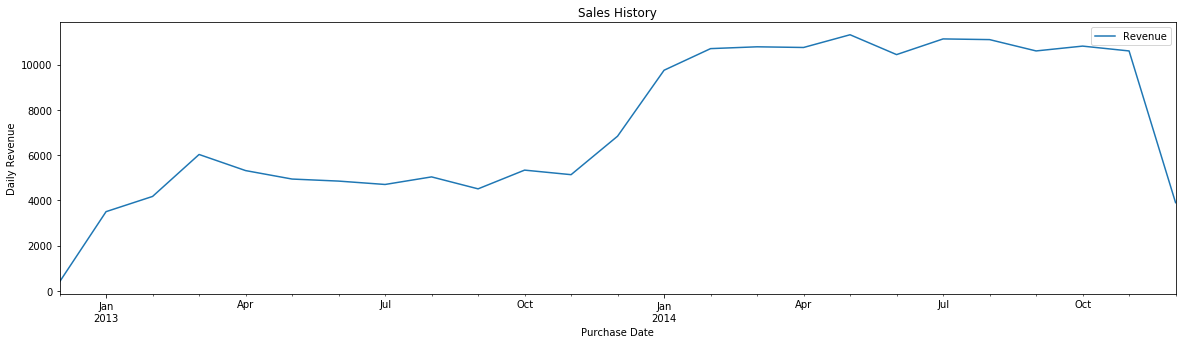

In [226]:
ts.plot(figsize=(20,5), kind='line')
plt.ylabel("Daily Revenue")
plt.title("Sales History")
plt.show()

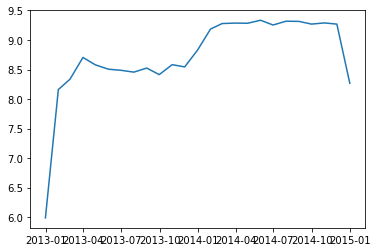

In [12]:
ts_log=np.log(ts)
plt.plot(ts_log)

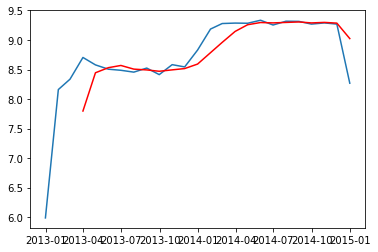

In [13]:
moving_avg = ts_log.rolling(4).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color="red")

In [14]:
ts_log_moving_average_diff=ts_log-moving_avg
ts_log_moving_average_diff.dropna(inplace=True)
ts_log_moving_average_diff.head()

Revenue
Purchase Date          
2013-03-31     0.906878
2013-04-30     0.133474
2013-05-31    -0.025691
2013-06-30    -0.081732
2013-07-31    -0.050910

In [15]:
def test_stationarity(timeseries,window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

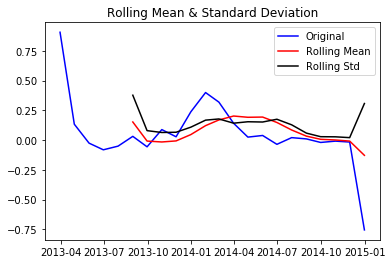

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [16]:
test_stationarity(ts_log_moving_average_diff,6)

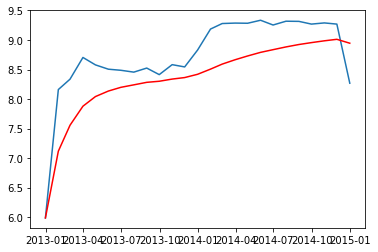

In [17]:
expweighted_avg=ts_log.ewm(com=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

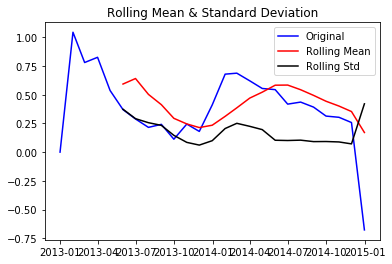

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [18]:
ts_log_expweighted_avg_diff=ts_log-expweighted_avg
test_stationarity(ts_log_expweighted_avg_diff, 6)